In [8]:
import sympy as sp

# Define the variables
x1, x2 = sp.symbols('x1 x2')

# Define the vector x
x = sp.Matrix([x1, x2])

# Define the matrix A
A = sp.Matrix([[2, 1], [1, 20]])

# Define the vector b
b = sp.Matrix([5, 3])

# Define the function f(x)
f = (1/2) * x.dot(A * x) - b.dot(x)

# Calculate the gradient of f
gradient_f = sp.Matrix([sp.diff(f, var) for var in (x1, x2)])

# Display the gradient
gradient_f

Matrix([
[ 2.0*x1 + 1.0*x2 - 5],
[1.0*x1 + 20.0*x2 - 3]])

array([2.48717457, 0.0256413 ])

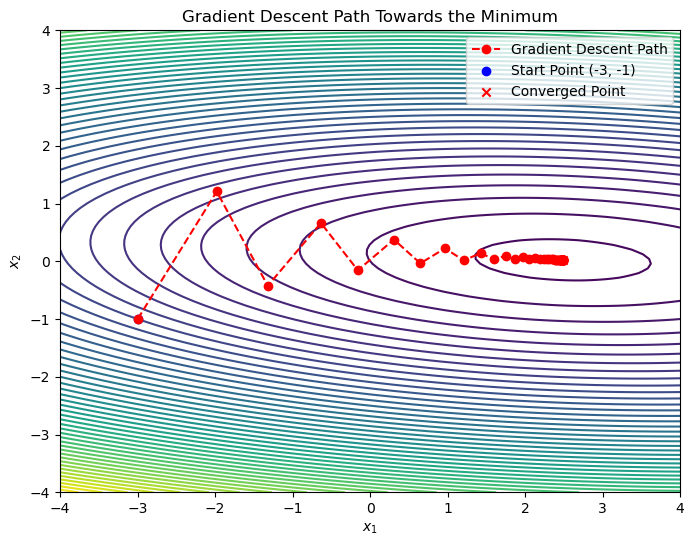

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols
x1, x2 = sp.symbols('x1 x2')

# Define the vector x
x = sp.Matrix([x1, x2])

# Define the matrix A and vector b
A = sp.Matrix([[2, 1], [1, 20]])
b = sp.Matrix([5, 3])

# Define the function f(x)
f = (1/2) * x.dot(A * x) - b.dot(x)

# Calculate the gradient of f
gradient_f = sp.Matrix([sp.diff(f, var) for var in (x1, x2)])

# Convert gradient to a numerical function using lambdify
gradient_func = sp.lambdify((x1, x2), gradient_f, 'numpy')

# Gradient descent parameters
gamma = 0.085
x_current = np.array([-3, -1], dtype=float)  # Initial point
tolerance = 1e-6  # Convergence tolerance
max_iterations = 1000  # Maximum number of iterations

# Lists to store the trajectory of x
trajectory = [x_current.copy()]

# Perform gradient descent
for _ in range(max_iterations):
    grad = np.array(gradient_func(x_current[0], x_current[1])).flatten()
    x_next = x_current - gamma * grad
    trajectory.append(x_next.copy())
    
    # Check for convergence
    if np.linalg.norm(x_next - x_current) < tolerance:
        break
    x_current = x_next

# Convert the trajectory into a NumPy array for easy plotting
trajectory = np.array(trajectory)
display(trajectory[-1])

# Plotting the function contours and the gradient descent path
x1_vals = np.linspace(-4, 4, 100)
x2_vals = np.linspace(-4, 4, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = (1/2) * (2 * X1**2 + 2 * X1 * X2 + 20 * X2**2) - 5 * X1 - 3 * X2

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro--', label='Gradient Descent Path')
plt.scatter(-3, -1, color='blue', marker='o', label='Start Point (-3, -1)')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', marker='x', label='Converged Point')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Descent Path Towards the Minimum')
plt.legend()
plt.show()

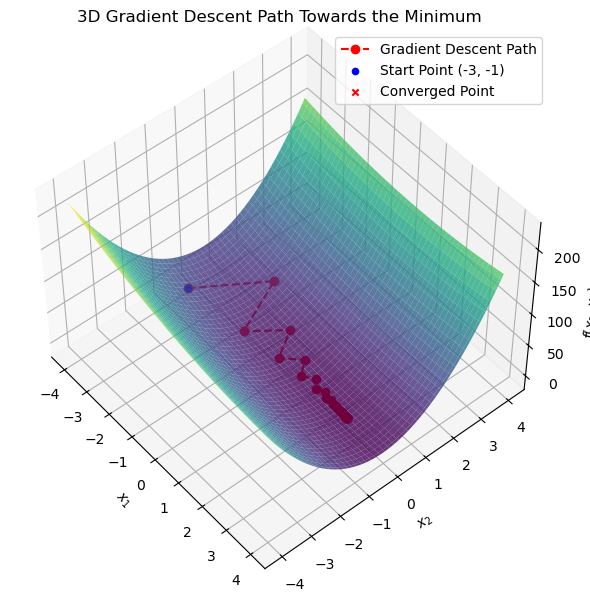

In [37]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols
x1, x2 = sp.symbols("x1 x2")

# Define the vector x
x = sp.Matrix([x1, x2])

# Define the matrix A and vector b
A = sp.Matrix([[2, 1], [1, 20]])
b = sp.Matrix([5, 3])

# Define the function f(x)
f = (1 / 2) * x.dot(A * x) - b.dot(x)

# Calculate the gradient of f
gradient_f = sp.Matrix([sp.diff(f, var) for var in (x1, x2)])

# Convert function and gradient to numerical functions using lambdify
f_func = sp.lambdify((x1, x2), f, "numpy")
gradient_func = sp.lambdify((x1, x2), gradient_f, "numpy")

# Gradient descent parameters
gamma = 0.085
x_current = np.array([-3, -1], dtype=float)  # Initial point
tolerance = 1e-6  # Convergence tolerance
max_iterations = 1000  # Maximum number of iterations

# Lists to store the trajectory of x
trajectory = [x_current.copy()]

# Perform gradient descent
for _ in range(max_iterations):
    grad = np.array(gradient_func(x_current[0], x_current[1])).flatten()
    x_next = x_current - gamma * grad
    trajectory.append(x_next.copy())

    # Check for convergence
    if np.linalg.norm(x_next - x_current) < tolerance:
        break
    x_current = x_next

# Convert the trajectory into a NumPy array for easy plotting
trajectory = np.array(trajectory)

# Generate data for the 3D surface plot
x1_vals = np.linspace(-4, 4, 100)
x2_vals = np.linspace(-4, 4, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f_func(X1, X2)

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X1, X2, Z, cmap="viridis", alpha=0.8)  # Surface plot
ax.plot(
    trajectory[:, 0],
    trajectory[:, 1],
    f_func(trajectory[:, 0], trajectory[:, 1]),
    "ro--",
    label="Gradient Descent Path",
)  # Descent path
ax.scatter(
    -3, -1, f_func(-3, -1), color="blue", marker="o", label="Start Point (-3, -1)"
)
ax.scatter(
    trajectory[-1, 0],
    trajectory[-1, 1],
    f_func(trajectory[-1, 0], trajectory[-1, 1]),
    color="red",
    marker="x",
    label="Converged Point",
)

# Labeling
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1, x_2)$")
ax.set_title("3D Gradient Descent Path Towards the Minimum")
ax.legend()

# See the gradient descent from a better angle
ax.view_init(azim=-40,elev=50)

plt.show()

Now let's map it with its convex conjugate:

x1*y1 - 0.5*x1*(2*x1 + x2) + 5*x1 + x2*y2 - 0.5*x2*(x1 + 20*x2) + 3*x2

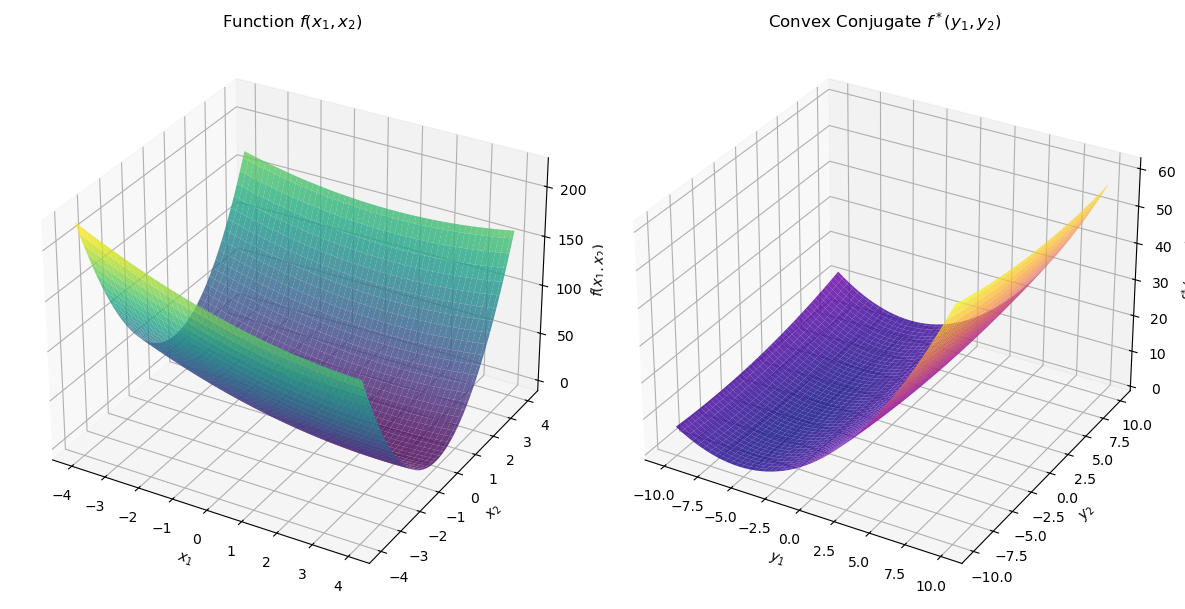

In [39]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols
x1, x2, y1, y2 = sp.symbols('x1 x2 y1 y2')

# Define the vector x and the variables for the conjugate
x = sp.Matrix([x1, x2])
y = sp.Matrix([y1, y2])

# Define the matrix A and vector b
A = sp.Matrix([[2, 1], [1, 20]])
b = sp.Matrix([5, 3])

# Define the function f(x)
f = (1/2) * x.dot(A * x) - b.dot(x)

# Calculate the convex conjugate f*(y)
L = y.dot(x) - f  # Legendre-Fenchel transform
display(L)
x_star = sp.solve([sp.diff(L, x1), sp.diff(L, x2)], (x1, x2))
f_star = L.subs(x1, x_star[x1]).subs(x2, x_star[x2])

# Convert functions to numerical functions using lambdify
f_func = sp.lambdify((x1, x2), f, 'numpy')
f_star_func = sp.lambdify((y1, y2), f_star, 'numpy')

# Generate data for the 3D surface plots
x1_vals = np.linspace(-4, 4, 100)
x2_vals = np.linspace(-4, 4, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z_f = f_func(X1, X2)

y1_vals = np.linspace(-10, 10, 100)
y2_vals = np.linspace(-10, 10, 100)
Y1, Y2 = np.meshgrid(y1_vals, y2_vals)
Z_f_star = f_star_func(Y1, Y2)

# Create the 3D plot
fig = plt.figure(figsize=(12, 6))

# Plot f(x)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Z_f, cmap='viridis', alpha=0.8)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1, x_2)$')
ax1.set_title('Function $f(x_1, x_2)$')

# Plot f*(y)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(Y1, Y2, Z_f_star, cmap='plasma', alpha=0.8)
ax2.set_xlabel('$y_1$')
ax2.set_ylabel('$y_2$')
ax2.set_zlabel('$f^*(y_1, y_2)$')
ax2.set_title('Convex Conjugate $f^*(y_1, y_2)$')

plt.tight_layout()
plt.show()


I'm trying to convince myself that since $\displaystyle \mathcal{L}(\boldsymbol{x} ,\boldsymbol{\lambda }) =f(\boldsymbol{x}) +\boldsymbol{\lambda }^{\intercal }\boldsymbol{g}(\boldsymbol{x})$ is affine with respect to $\displaystyle \boldsymbol{\lambda }$, $\displaystyle \mathfrak{D} (\boldsymbol{\lambda })$ is concave even though $\displaystyle f( \cdotp )$ and $\displaystyle g( \cdotp )$ may be nonconvex.

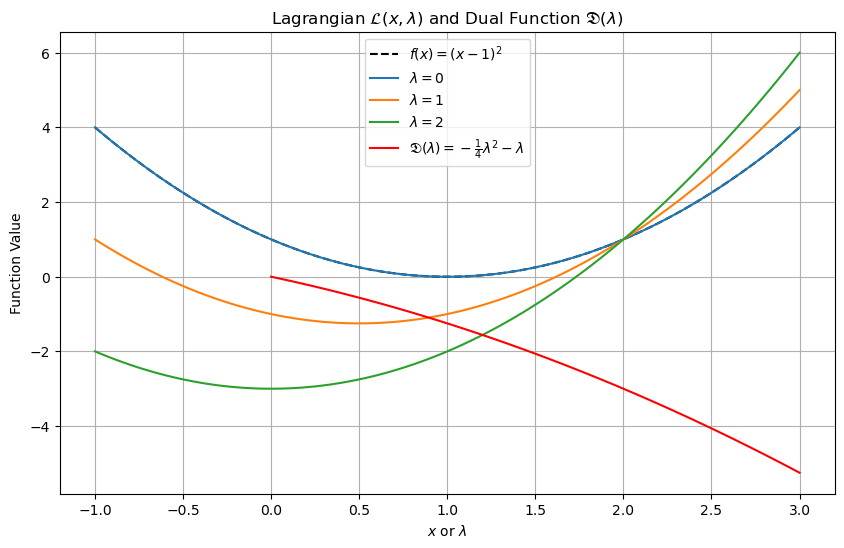

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f(x):
    return (x - 1)**2

def g(x):
    return x - 2

def L(x, lam):
    return f(x) + lam * g(x)

def D(lam):
    return -0.25 * lam**2 - lam

# Generate x values for f and L
x_values = np.linspace(-1, 3, 100)
lambda_values = [0, 1, 2]  # Example values for λ

# Plot f(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values), label="$f(x) = (x - 1)^2$", color="black", linestyle="--")

# Plot the Lagrangian for different values of λ
for lam in lambda_values:
    L_values = L(x_values, lam)
    plt.plot(x_values, L_values, label=f"$\\lambda = {lam}$")

# Plot the dual function D(λ)
lambda_range = np.linspace(0, 3, 100)  # λ values for plotting D(λ)
plt.plot(lambda_range, D(lambda_range), label="$\\mathfrak{D}(\\lambda) = -\\frac{1}{4}\\lambda^2 - \\lambda$", color="red")

# Labeling the plot
plt.title("Lagrangian $\\mathcal{L}(x, \\lambda)$ and Dual Function $\\mathfrak{D}(\\lambda)$")
plt.xlabel("$x$ or $\\lambda$")
plt.ylabel("Function Value")
plt.legend()
plt.grid(True)
plt.show()
